In [1]:
import pandas as pd
import geopandas as gpd

C:\Users\dante\AppData\Local\Temp\ipykernel_26184\1259499560.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
fmbd = gpd.read_file('data/Former Municipality Boundaries Data.geojson')
fmbd

,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,49884.0,,49884.0,49886.0,14,14,YORK,YORK,11093905,"MULTIPOLYGON (((-79.49262 43.64744, -79.49249 ..."
1,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465,"MULTIPOLYGON (((-79.53584 43.70812, -79.53591 ..."
2,3,49887.0,,49887.0,49886.0,06,06,EAST YORK,EAST YORK,12266929,"MULTIPOLYGON (((-79.28776 43.68978, -79.28909 ..."
3,4,435733.0,,435733.0,49886.0,01,01,SCARBOROUGH,SCARBOROUGH,12852625,"MULTIPOLYGON (((-79.28776 43.68978, -79.28792 ..."
4,5,1094349.0,,1094349.0,49886.0,19,19,ETOBICOKE,ETOBICOKE,14035025,"MULTIPOLYGON (((-79.48165 43.61872, -79.48180 ..."
5,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041,"MULTIPOLYGON (((-79.39652 43.62232, -79.39685 ..."


In [12]:
fmbd["AREA_SHORT_CODE"].max()

'19'

In [13]:
fmbd["AREA_ID"].mean()

505700.3333333333

<Axes: >

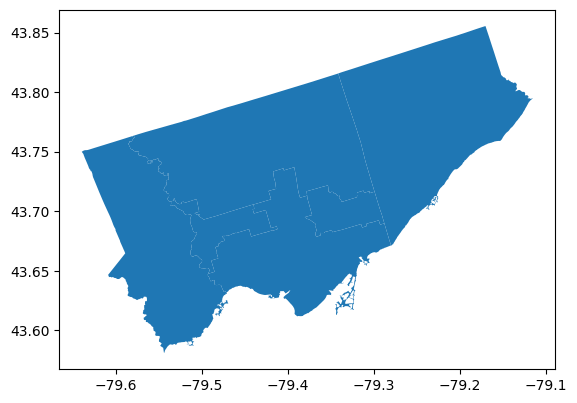

In [17]:
fmbd.crs
fmbd.plot()

<Axes: >

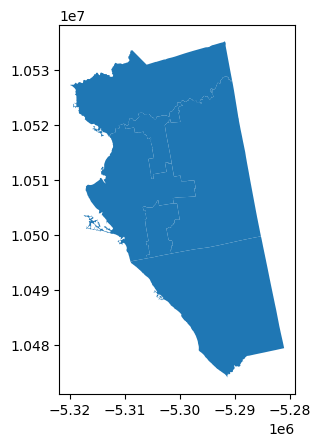

In [18]:
fmbd_new = fmbd.to_crs("EPSG:32633")
fmbd_new.plot()

<Axes: >

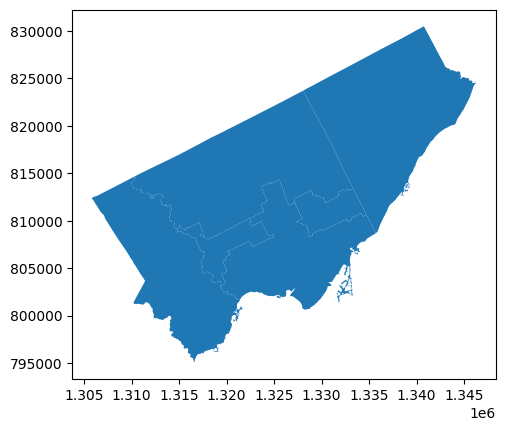

In [22]:
fmbd_new2 = fmbd_new.to_crs("ESRI:102003")
fmbd_new2.plot()

In [23]:
fmbd["AREA_NEW_CODE"] = (
    fmbd["AREA_SHORT_CODE"] + fmbd["AREA_LONG_CODE"]
)

In [26]:
fmbd

,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry,AREA_NEW_CODE
0,1,49884.0,,49884.0,49886.0,14,14,YORK,YORK,11093905,"MULTIPOLYGON (((-79.49262 43.64744, -79.49249 ...",1414
1,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465,"MULTIPOLYGON (((-79.53584 43.70812, -79.53591 ...",0808
2,3,49887.0,,49887.0,49886.0,06,06,EAST YORK,EAST YORK,12266929,"MULTIPOLYGON (((-79.28776 43.68978, -79.28909 ...",0606
3,4,435733.0,,435733.0,49886.0,01,01,SCARBOROUGH,SCARBOROUGH,12852625,"MULTIPOLYGON (((-79.28776 43.68978, -79.28792 ...",0101
4,5,1094349.0,,1094349.0,49886.0,19,19,ETOBICOKE,ETOBICOKE,14035025,"MULTIPOLYGON (((-79.48165 43.61872, -79.48180 ...",1919
5,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041,"MULTIPOLYGON (((-79.39652 43.62232, -79.39685 ...",0404


In [46]:
shelters = gpd.read_file("data/shelters.geojson")
shelterscrs = shelters.to_crs("EPSG:4326")
shelterscrs.buffer(10)

C:\Users\dante\AppData\Local\Temp\ipykernel_26184\3581111896.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shelterscrs.buffer(10)


0     POLYGON ((-69.37841 43.66015, -69.42656 42.679...
1     POLYGON ((-69.39544 43.79811, -69.44359 42.817...
2     POLYGON ((-69.37243 43.65924, -69.42058 42.679...
3     POLYGON ((-69.39324 43.64875, -69.44139 42.668...
4     POLYGON ((-69.40628 43.67362, -69.45444 42.693...
5     POLYGON ((-69.34965 43.69093, -69.39780 42.710...
6     POLYGON ((-69.37922 43.66586, -69.42737 42.685...
7     POLYGON ((-69.39147 43.65205, -69.43963 42.671...
8     POLYGON ((-69.41137 43.64802, -69.45953 42.667...
9     POLYGON ((-69.40369 43.65198, -69.45184 42.671...
10    POLYGON ((-69.34308 43.66014, -69.39123 42.679...
11    POLYGON ((-69.39801 43.64819, -69.44616 42.668...
12    POLYGON ((-69.58048 43.73630, -69.62863 42.756...
13    POLYGON ((-69.38971 43.68479, -69.43787 42.704...
14    POLYGON ((-69.38971 43.68479, -69.43787 42.704...
15    POLYGON ((-69.45666 43.68089, -69.50482 42.700...
16    POLYGON ((-69.22870 43.72796, -69.27685 42.747...
17    POLYGON ((-69.26743 43.76831, -69.31558 42